# Нулевая лабораторная работа по ML

| Студент | Суханов Е.А. |
|---------|--------|
| Группа  | М8О-306Б-19      |

In [1]:
# Давайте загрузим датасет
import pandas as pd

ds = pd.read_csv("heart_2020_cleaned.csv")
ds.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Как мы видим, все значения не нулевые, что хорошо.
Тем не менее у нас много категориальных признаков. Для них мы будем использовать one-hot и label encoding. Но сначала продолжим анализировать данные.

In [3]:
ds.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


Мы хотим рассмотреть предрасположенность человека к заболеваниям сердечно-сосудистой системы, поэтому я хочу объединить два признака "HeartDisease" и "Stroke". Так как их оба можно отнести к сердечно-сосудистой системе.

In [4]:
# Объединять буду с помощью логического или
f = {"Yes": True, "No": False, True: "Yes", False: "No"}
ff = {"Yes": 1.0, "No": 0.0}
def gen(a,b):
    res = []
    for i in range(len(a)):
        res.append(ff[f[f[a[i]] or f[b[i]]]])
    return res

a = ds["HeartDisease"]
# b = ds["HeartDisease"]
b = ds["Stroke"]
HeartDiseaseOrStroke = pd.DataFrame(gen(a,b), columns=["HeartDiseaseOrStroke"])
ds_target = pd.concat([ds.drop(["HeartDisease","Stroke"], axis=1), HeartDiseaseOrStroke],axis=1)

Преведем все поля к числовым

In [5]:
# Поля, которые будут приведены к числовым с помощью one-hot encoding
one_hot_encoding = ["Smoking", "AlcoholDrinking", "DiffWalking", "Sex", "Race", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "Diabetic"]

one_hot_encode = pd.get_dummies(ds_target[one_hot_encoding], prefix=one_hot_encoding)
cleaned_ds = pd.concat([ds_target.drop(columns = one_hot_encoding), one_hot_encode], axis=1)

In [6]:

# Поля, которые будут приведены к числовым с помощью label encoding
label_encoding = {"GenHealth": {'Poor':-2, 'Fair':-1, 'Good':0, 'Very good':1, 'Excellent':2}, 
                    "AgeCategory": {'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12, '80 or older':13}}
def lable_encoder(labels):
    def encoder(x):
        return labels[x]
    return encoder

In [7]:
for (k,v) in label_encoding.items():
    encoder = lable_encoder(v)
    l = list(map(encoder, ds[k]))
    l = pd.DataFrame({k: l})
    cleaned_ds = pd.concat([l, cleaned_ds.drop([k], axis=1)], axis=1)

In [8]:
cleaned_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   AgeCategory                          319795 non-null  int64  
 1   GenHealth                            319795 non-null  int64  
 2   BMI                                  319795 non-null  float64
 3   PhysicalHealth                       319795 non-null  float64
 4   MentalHealth                         319795 non-null  float64
 5   SleepTime                            319795 non-null  float64
 6   HeartDiseaseOrStroke                 319795 non-null  float64
 7   Smoking_No                           319795 non-null  uint8  
 8   Smoking_Yes                          319795 non-null  uint8  
 9   AlcoholDrinking_No                   319795 non-null  uint8  
 10  AlcoholDrinking_Yes                  319795 non-null  uint8  
 11  DiffWalking_N

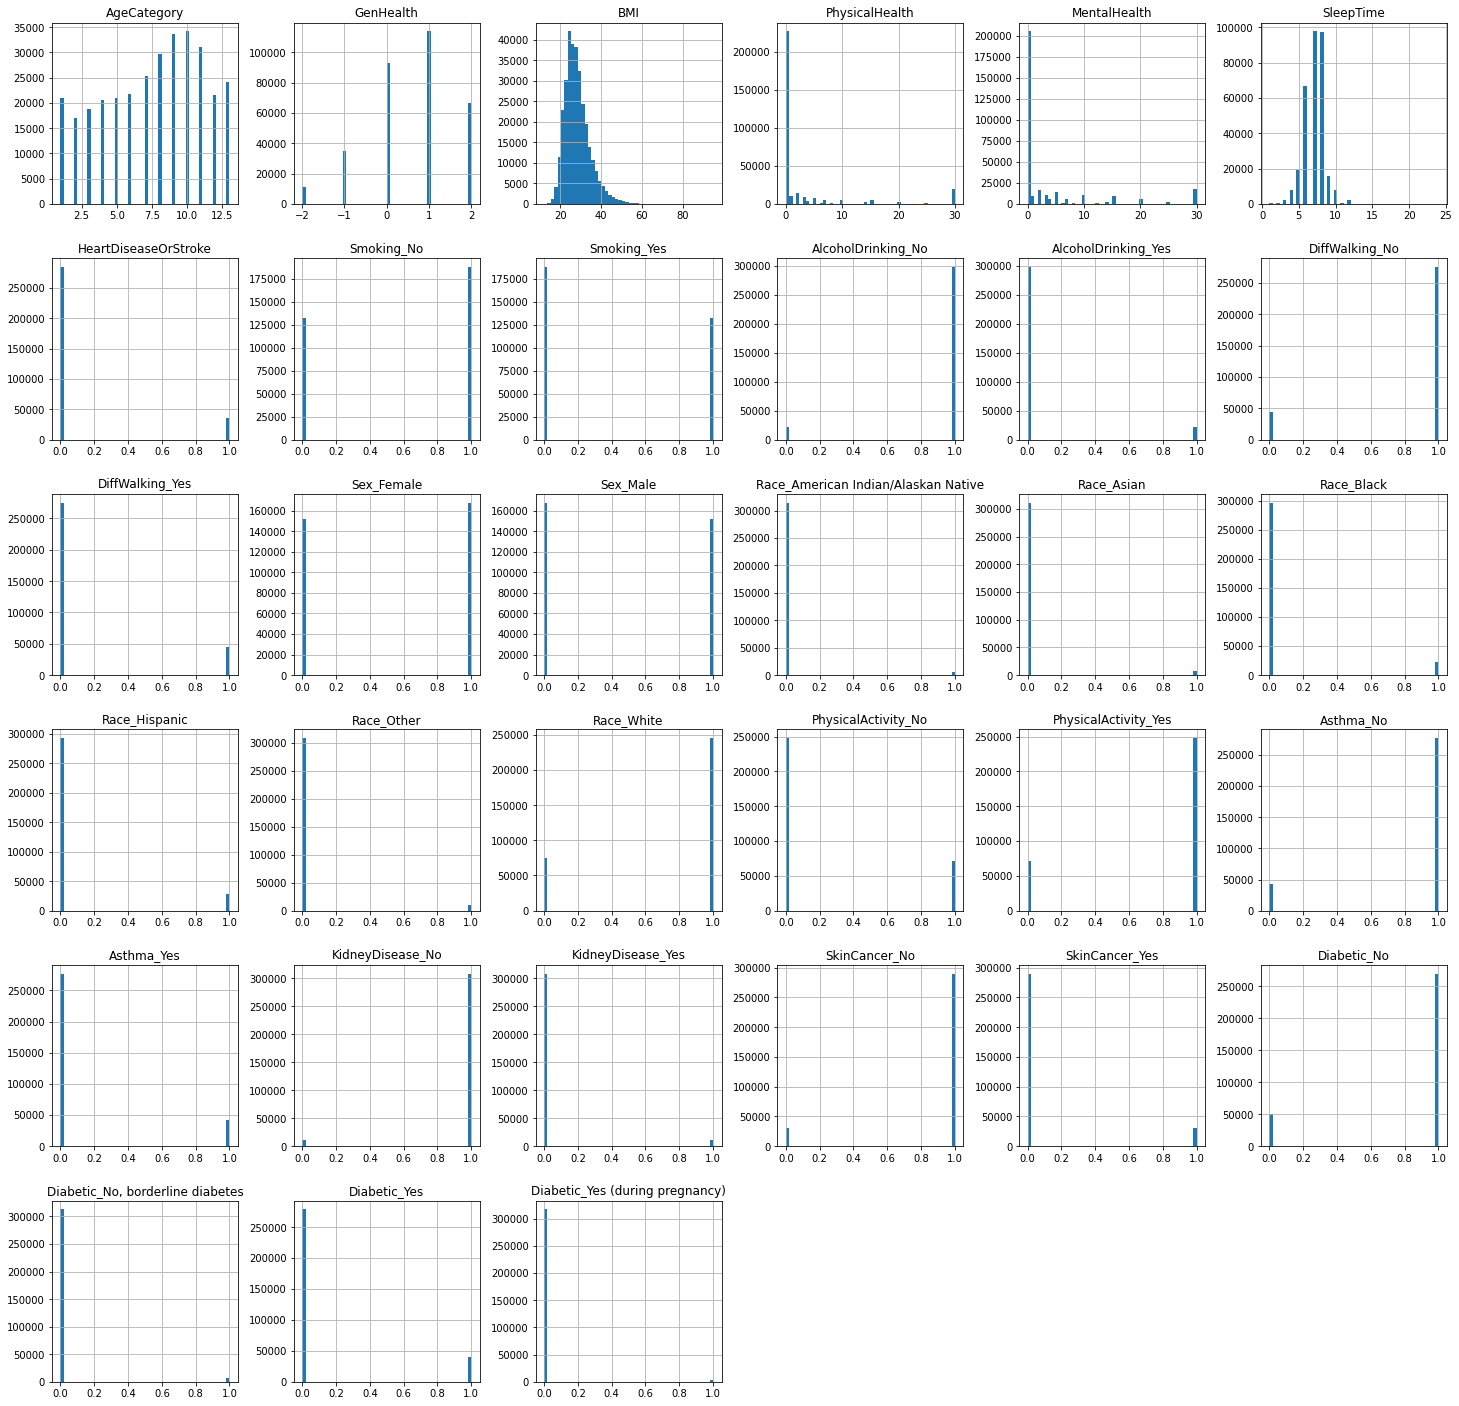

In [9]:
import matplotlib.pyplot as plt
cleaned_ds.hist(bins = 50,figsize=(25,25))
plt.show()

## Корреляция

In [10]:
cleaned_ds.corr()["HeartDiseaseOrStroke"].sort_values(ascending = False)

HeartDiseaseOrStroke                   1.000000
AgeCategory                            0.258813
DiffWalking_Yes                        0.235415
Diabetic_Yes                           0.192841
PhysicalHealth                         0.192658
KidneyDisease_Yes                      0.151876
Smoking_Yes                            0.115215
PhysicalActivity_No                    0.114062
SkinCancer_Yes                         0.098469
Sex_Male                               0.054984
BMI                                    0.051329
Asthma_Yes                             0.048202
MentalHealth                           0.040051
Race_White                             0.036904
AlcoholDrinking_No                     0.035562
Diabetic_No, borderline diabetes       0.019644
SleepTime                              0.012925
Race_American Indian/Alaskan Native    0.010825
Race_Black                             0.002701
Race_Other                            -0.001478
Diabetic_Yes (during pregnancy)       -0

Самое опасное в корреляции то, что она может связывать два признака, которые не имеют причинно-следственной связи. 

Посмотрим на матрицу корреляции

<AxesSubplot:>

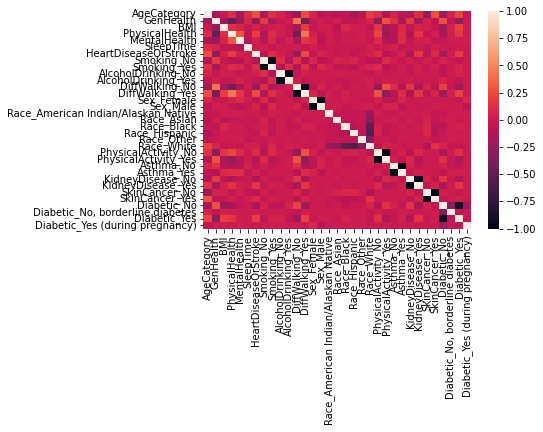

In [11]:
import seaborn as sn
sn.heatmap(cleaned_ds.corr(), xticklabels=1, yticklabels=1)

Можно попробовать убрать свойства, которые вносят малый вклад (корреляция относительно главного значения близка к нулю).
Такими свойствами являются:
- Diabetic_Yes (during pregnancy);
- Diabetic_No, borderline diabetes;
- Признаки рас. Можно увидеть, что хоть они и вносят в некоторых местах небольшой вклад, но в целом сильной разницы не видно;

In [12]:
cleaned_ds = cleaned_ds.drop(["Diabetic_Yes (during pregnancy)","Diabetic_No, borderline diabetes", "Race_Asian", "Race_Black", "Race_Hispanic", "Race_Other", "Race_White", "Race_American Indian/Alaskan Native"], axis=1)

<AxesSubplot:>

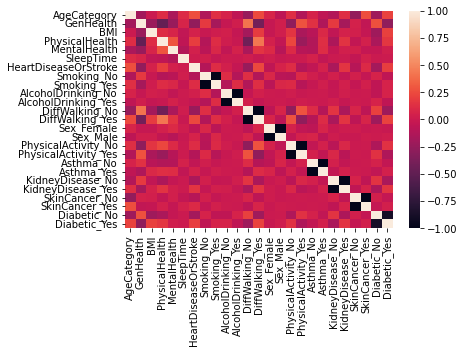

In [13]:
sn.heatmap(cleaned_ds.corr(), xticklabels=1, yticklabels=1)

## Зависимость от главного значения

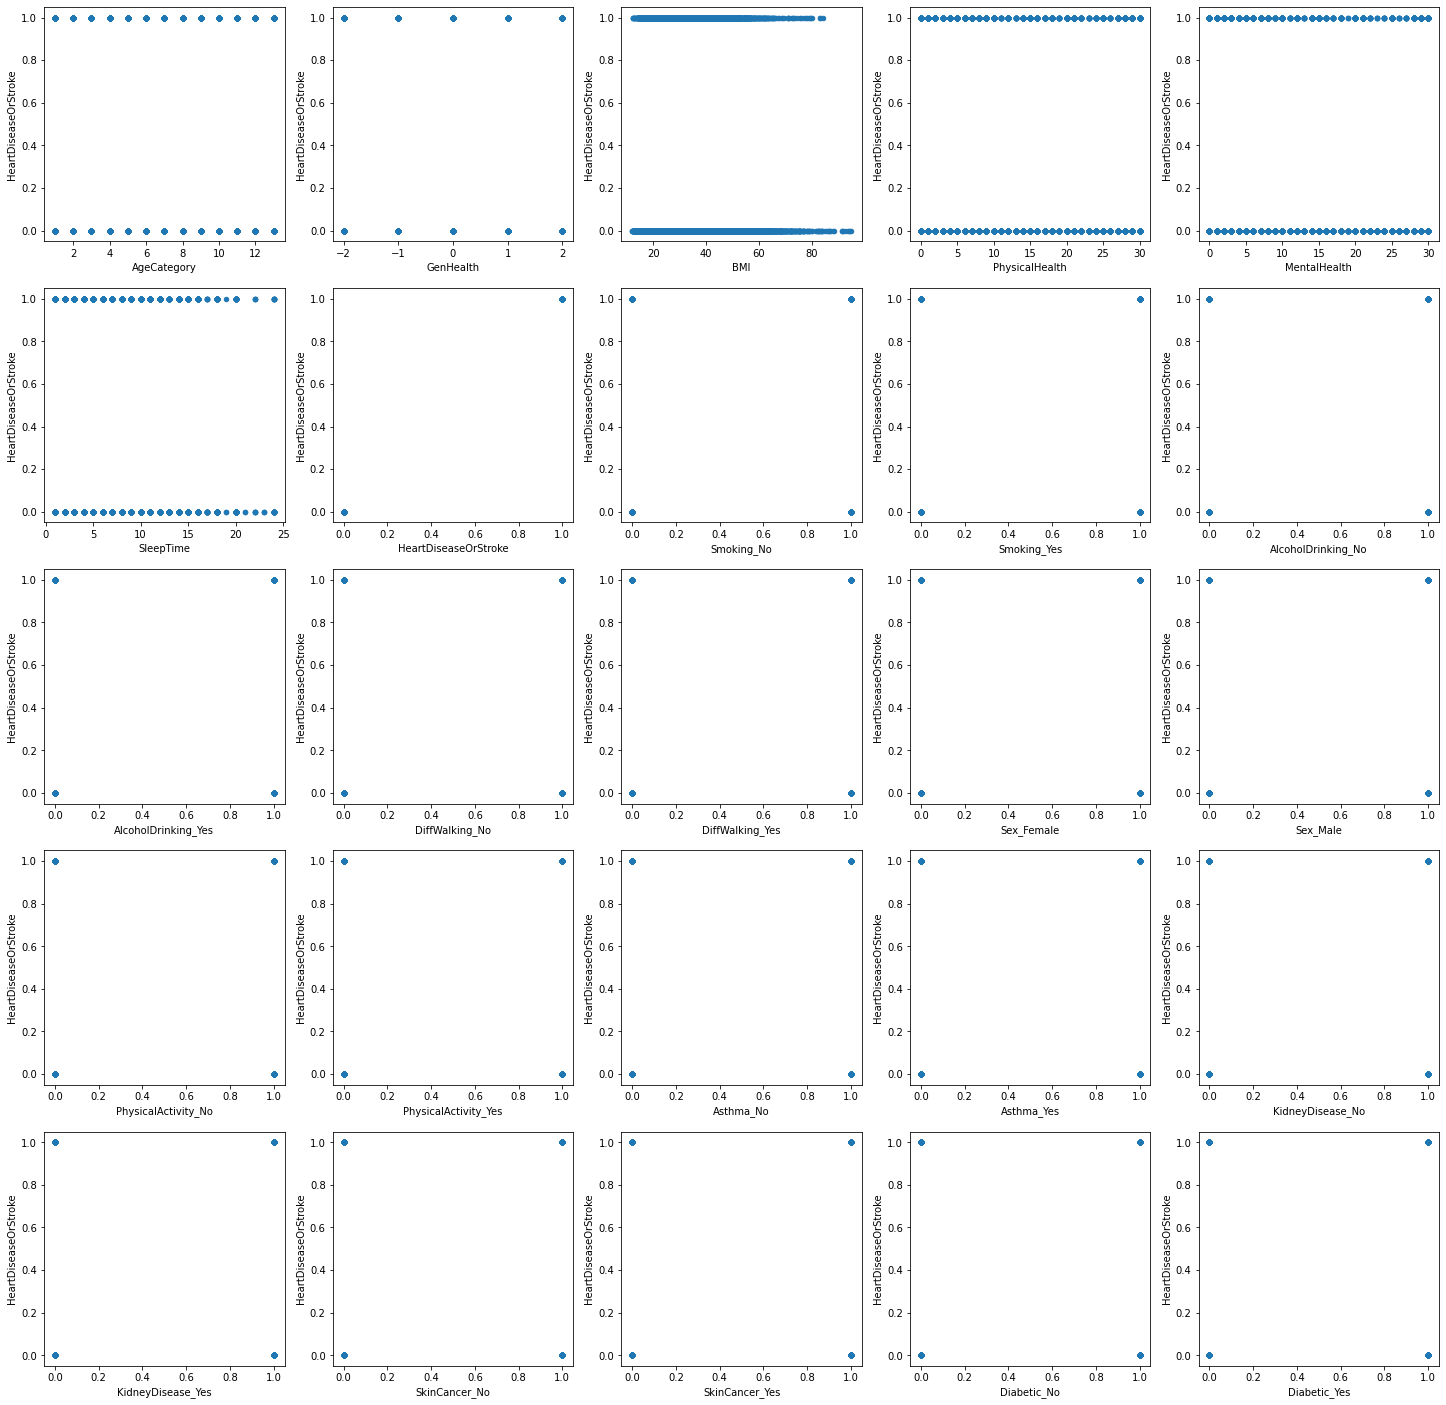

In [14]:
m = 5
n = (len(cleaned_ds.columns) + 4) // 5
fig, ax = plt.subplots(ncols = n, nrows = m, figsize = (25, 25))
for i in range(n):
    for j in range(m):
        if (i * m + j >= len(cleaned_ds.columns)):
            break
        cleaned_ds.plot.scatter(x = cleaned_ds.columns[i * m + j], y = "HeartDiseaseOrStroke", ax=ax[i][j])

Так как большинство свойств являются бинарными, данный график не информативен.

In [15]:
# Сохраним датасет
cleaned_ds.to_csv("ds.csv", index=False)